In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix
%matplotlib inline

# import data

In [2]:
#dataの読み込み
data = pd.read_csv(r'C:\Users\User\Downloads\kaggle\heart attack\heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 2.preprocessing

In [4]:
#大きさとは関係ない値をonehotに変える
onehot_list = ['cp','restecg','slope','ca','thal']
data = pd.get_dummies(data,columns=onehot_list)

In [5]:
#列をくっつけあう
datax = data.drop('target',axis=1)
datay = data.target

In [6]:
list_keep=[18,25,8,1,7,2,10,21,13,26,22,19,15]
datax_keep = datax.iloc[:,list_keep]

In [7]:
datax_keep.head()

,ca_0,thal_2,cp_0,sex,oldpeak,trestbps,cp_2,ca_3,restecg_1,thal_3,ca_4,ca_1,slope_0
0,1,0,0,1,2.3,145,0,0,0,0,0,0,1
1,1,1,0,1,3.5,130,1,0,1,0,0,0,1
2,1,1,0,0,1.4,130,0,0,0,0,0,0,0
3,1,1,0,1,0.8,120,0,0,1,0,0,0,0
4,1,1,1,0,0.6,120,0,0,1,0,0,0,0


In [8]:
#test/trainに分ける
x_train,x_test,y_train,y_test = train_test_split(datax_keep,datay,test_size=0.3,random_state=0)

# 3.create model

In [9]:
model_jmda = RandomForestClassifier(random_state=0)
para={'n_estimators':range(50,70),'max_depth':range(2,30)}
grid = GridSearchCV(model_jmda,para,cv=5,verbose=1,n_jobs=-1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 2800 out of 2800 | elapsed:   54.0s finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max

In [10]:
read_list = ['param_n_estimators','param_max_depth','mean_test_score']
cv_detail = pd.DataFrame(grid.cv_results_)
cv_detail[read_list].sort_values('mean_test_score',ascending=False).head(5)

,param_n_estimators,param_max_depth,mean_test_score
38,68,3,0.839623
39,69,3,0.834906
36,66,3,0.834906
34,64,3,0.834906
27,57,3,0.834906


Text(0.5, 1.0, 'parameter_adjusting')

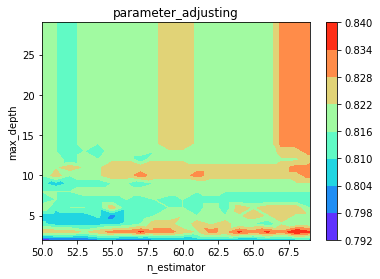

In [11]:
x=cv_detail.param_n_estimators.values.astype('float')
y=cv_detail.param_max_depth.values.astype('float')
z=cv_detail.mean_test_score.values.astype('float')
plt.tricontourf(x,y,z,cmap='rainbow')
plt.colorbar()
plt.xlabel('n_estimator');plt.ylabel('max_depth')
plt.title('parameter_adjusting')

In [12]:
model_jmda = RandomForestClassifier(n_estimators=68,max_depth=3,random_state=0)
model_jmda.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=68,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# metrics

In [13]:
def scorer(matrix):
    accuracy = np.round((matrix[1,1]+matrix[0,0])/(matrix.sum()),3)
    precision = np.round(matrix[1,1]/(matrix[1,1]+matrix[1,0]),3)
    recall = np.round(matrix[1,1]/(matrix[1,1]+matrix[0,1]),3)
    f1 = np.round(2/(1/precision+1/recall),3)
    print('accuracy:[{}] , precision:[{}] , recall:[{}] , f1:[{}]'.format(accuracy,precision,recall,f1))

accuracy:[0.802] , precision:[0.851] , recall:[0.784] , f1:[0.816]


Text(0.5, 1.0, 'confusion_matrix')

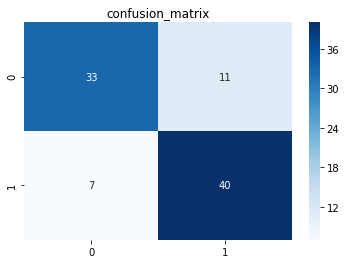

In [14]:
y_predict = np.array(grid.predict(x_test))
matrix = confusion_matrix(y_test,y_predict)
scorer(matrix)
sns.heatmap(matrix,cmap='Blues',annot=True)
plt.title('confusion_matrix')

# importance

In [15]:
import eli5
#PermutationImportance:固定其他變數打亂指定變數觀察預測出來的error值變化(越大代表importance值越大)
importance = eli5.sklearn.PermutationImportance(model_jmda,n_iter=50).fit(x_test,y_test)
eli5.explain_weights(importance,feature_names=list(datax_keep.columns),top=40)

Weight,Feature
0.0589 ± 0.0456,ca_0
0.0523 ± 0.0356,cp_0
0.0253 ± 0.0296,ca_1
0.0152 ± 0.0284,cp_2
0.0114 ± 0.0232,sex
0.0110 ± 0.0152,ca_3
0.0062 ± 0.0537,thal_2
0.0033 ± 0.0427,oldpeak
0.0007 ± 0.0092,slope_0
-0.0002 ± 0.0208,restecg_1


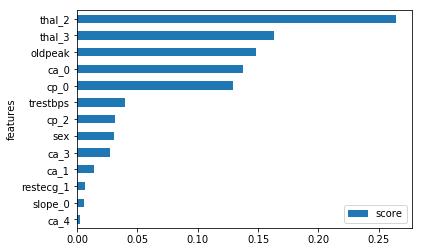

In [16]:
importance_rf = pd.DataFrame([])
importance_rf['features'] = datax_keep.columns
importance_rf['score'] = model_jmda.feature_importances_
importance_rf = importance_rf.sort_values('score')
importance_rf.plot(x='features',y='score',kind='barh')

# 單變量分析

In [17]:
from pdpbox import pdp

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x179c83b16d8>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x179c83e2898>})

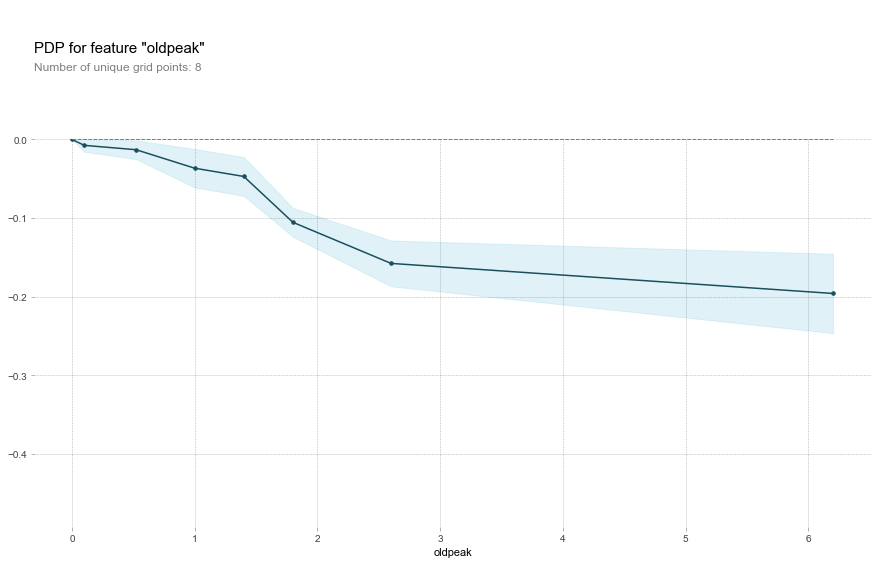

In [18]:
pdp_iso = pdp.pdp_isolate(model_jmda,datax_keep,model_features=list(datax_keep.columns),feature='oldpeak')
pdp.pdp_plot(pdp_iso,feature_name='oldpeak')

# 多變量分析

In [19]:
pdp_double = pdp.pdp_interact(model_jmda,datax_keep,model_features=list(datax_keep.columns),features=['oldpeak','sex'])

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x179cf304da0>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x179cf8bb198>})

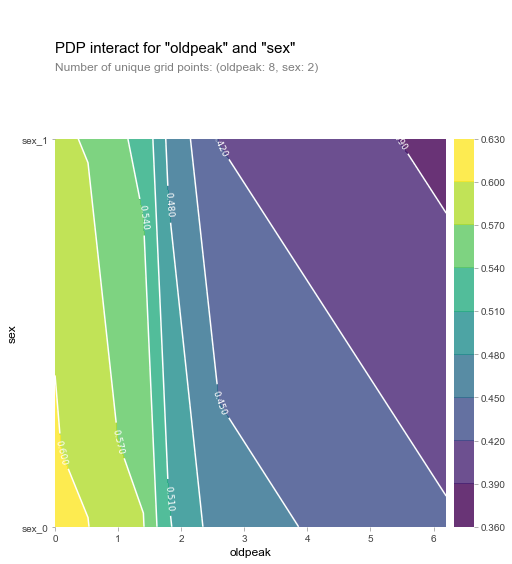

In [143]:
pdp.pdp_interact_plot(pdp_double,feature_names=['oldpeak','sex'])

# shap

### `shap value `: importance which has direction

- 1.`explaination of a row`
- 2.`explaination of all data`
- 3.`importance`
- 4.`Dependence Plot`

<img src='SHAP_row.png'>

In [47]:
import shap

In [54]:
#create explainer
explainer = shap.TreeExplainer(model_jmda)
#input data(datax_keep) into container(shap_values) >> transfer to shape_values(一対一)
shap_values = explainer.shap_values(datax_keep)

In [78]:
#shap baseline = model predict mean value（特徴の平均貢献）
print('shap_value shape:',np.array(shap_values).shape,'|| data shape:',datax_keep.shape)
print('shap baseline value(y):',explainer.expected_value)
print('data mean value(y):    ',[1-y_train.mean(),y_train.mean()])

shap_value shape: (2, 303, 13) || data shape: (303, 13)
shap baseline value(y): [0.44776637069922354, 0.5522336293007764]
data mean value(y):     [0.44339622641509435, 0.5566037735849056]


1.`explaination of a row`

In [100]:
# generate sample row
random_number = np.random.randint(0,len(datax_keep))
# table of samepla row(column_name,value,shap_value)
pd.DataFrame({'column_name':datax_keep.columns,
              'value':datax_keep.iloc[random_number,:].values,
              'shap_value':shap_values[1][random_number,:]})

,column_name,value,shap_value
0,ca_0,1.0,0.070928
1,thal_2,1.0,0.119144
2,cp_0,1.0,-0.055097
3,sex,1.0,-0.019222
4,oldpeak,1.2,0.011395
5,trestbps,140.0,-0.000364
6,cp_2,0.0,-0.009905
7,ca_3,0.0,0.006228
8,restecg_1,1.0,0.005475
9,thal_3,0.0,0.074802


In [135]:
# generate sample row
random_number = np.random.randint(0,len(datax_keep))
#answer
print('answer:',datay[random_number])
# output of model
print('model predict proba:',model_jmda.predict_proba(datax_keep.iloc[random_number,:].values.reshape(1,-1))[0][1])
#shap baseline value
print('baseline value:', explainer.expected_value[1])
#shap output value = shap baseline value + sum of shap values from sample row
print('shap output value:',shap_values[1][random_number,:].sum())

#shap plot of sample row
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][random_number,:], datax_keep.iloc[random_number,:])

answer: 1
model predict proba: 0.8534930761272705
baseline value: 0.5522336293007764
shap output value: 0.3012594468264936


2.`explaination of all data`

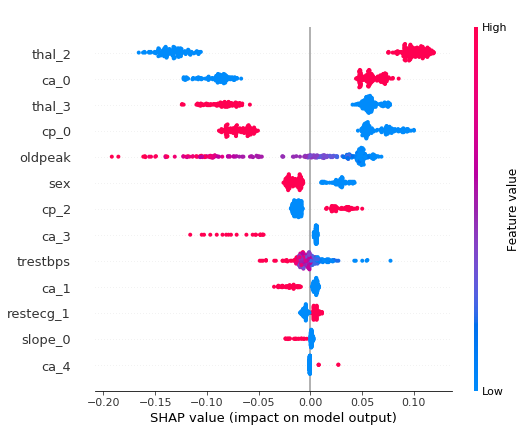

In [122]:
shap.summary_plot(shap_values[1], datax_keep)

3.`importance`

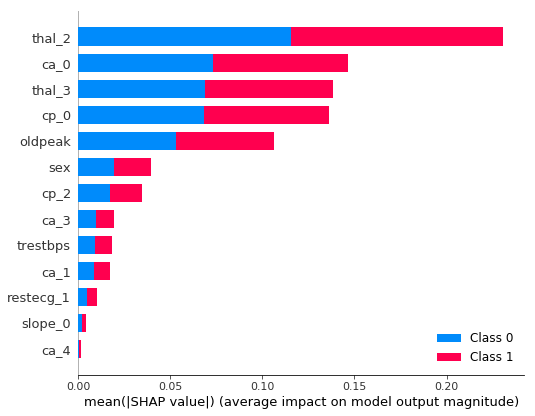

In [121]:
shap.summary_plot(shap_values, datax_keep, plot_type="bar")

4.`Dependence Plot`

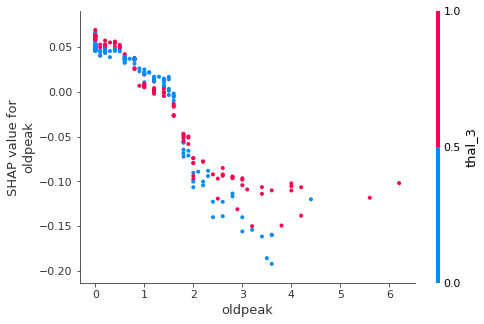

In [145]:
# feature values vs shap value(consider with another feature)
shap.dependence_plot('oldpeak', shap_values[1], datax_keep, interaction_index="thal_3")